## Tech Challeng FIAP

### Estudo de vinhos

#### O problema

Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.

Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:

1. Dados climáticos
2. Dados demográficos
3. Dados econômicos
4. Dados de avaliação de vinhos

O head de dados pediu para que você construísse uma tabela contendo as seguinte informações:

- País de origem (Brasil)
- País de destino
- Quantidade em litros de vinho exportado (utilize: 1KG = 1L)
- Valor em US$

Os dados que lhe forneceram são de uma vinícola parceira.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# carregando a base
base_vinhos = pd.read_csv('S:\FIAP\Fase1_Analise_Exploratoria_de_dados\ExpVinho.csv', encoding='utf-8', sep=';')
display(base_vinhos)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
124,125,Uruguai,0,0,0,0,0,0,0,0,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
125,126,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0
126,127,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,71,355,0,0,4086,9808,26415,35944,23220,32351


In [ ]:
# Filtrando os ultimo

In [9]:
display(base_vinhos.head(2))

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0


### Tratando os dados

In [10]:
# excluindo a coluna Id
base_vinhos = base_vinhos.drop('Id', axis=1)
base_vinhos = base_vinhos.set_index('País')

Foi necessário criar dfs separados para vendas e quantidade, tratar um de cada vez e depois unificar

In [4]:
# Armazenando todas as colunas da base na variavel "colunas"
colunas = base_vinhos.columns

#Criando as listas vazias para receber os daos de quantidade e vendas
colunas_qtd = []
colunas_vendas = []

#percorre cada coluna presente no DataFrame
for coluna in colunas:
      #Verifica se o nome da coluna termina com .1. Se sim, adiciona essa coluna à lista colunas_vendas.
      if coluna.endswith('.1'): 
            colunas_vendas.append(coluna)
      
      #Verifica se o comprimento do nome da coluna é igual a 4 (o que pode indicar que é uma coluna relacionada à quantidade). Se sim, adiciona essa coluna à lista colunas_qtd.
      elif len(coluna) == 4:          
            colunas_qtd.append(coluna)

      #Se a coluna não atender a nenhum dos critérios acima, ela é ignorada.
      else:
            pass
      
# criando dfs separados para as informações de quantidade e vendas
base_vinhos_qtd = base_vinhos[colunas_qtd]
base_vinhos_vendas = base_vinhos[colunas_vendas]

display(base_vinhos_qtd)
display(base_vinhos_vendas)

,País,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26,4,0,0
2,"Alemanha, República Democrática",0,0,4168,12000,0,0,0,0,0,...,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
3,Angola,0,0,0,0,0,0,0,0,0,...,1573,12182,1908,7359,10170,477,345,0,0,4068
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tuvalu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
124,Uruguai,0,0,0,0,0,0,0,1384,13396,...,1526,0,0,0,0,7711,6180,0,136774,637117
125,Vanuatu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,0
126,Venezuela,0,3200,1350,11700,9830,4050,0,0,0,...,0,14,0,0,680,71,0,4086,26415,23220


,1970.1,1971.1,1972.1,1973.1,1974.1,1975.1,1976.1,1977.1,1978.1,1979.1,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,95,21,0,0
2,0,0,2630,8250,0,0,0,0,0,6500,...,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
3,0,0,0,0,0,0,0,0,0,2387643,...,9300,23124,17089,35390,61680,709,1065,0,0,4761
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
124,0,0,0,0,0,0,0,720,5128,12285,...,13343,0,0,0,0,29617,18497,0,149842,997367
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,31,0,0
126,0,2000,750,6458,5250,2488,0,0,0,0,...,0,232,0,0,2646,355,0,9808,35944,32351


Tratando df de quantidade

In [7]:
# filtrando apenas os ultimos 15 anos
base_vinhos_qtd = base_vinhos_qtd.iloc[:, -16:]

# criando coluna de total
base_vinhos_qtd['Total'] = base_vinhos_qtd.sum(axis=1)

# removendo países sem dados de vendas
base_vinhos_qtd = base_vinhos_qtd.loc[base_vinhos_qtd['Total'] != 0]

# ordenando o df pela coluna de total
base_vinhos_qtd = base_vinhos_qtd.sort_values(by='Total', ascending=False)

# removendo a coluna de total porque pode atrapalhar em uma visualizaçao por exemplo
base_vinhos_qtd = base_vinhos_qtd.drop('Total', axis=1)

# pivotando as colunas para linhas
base_vinhos_qtd = base_vinhos_qtd.reset_index()
base_vinhos_qtd = base_vinhos_qtd.melt(id_vars=["País"], var_name="Periodo", value_name="Venda_volume")

# renomenado as colunas
base_vinhos_qtd.columns = ['Pais', 'Periodo', 'Venda_volume']

# transformando a coluna de período em data ano
base_vinhos_qtd['Periodo'] = base_vinhos_qtd['Periodo'].astype('Int64')

# transformando a coluna de quantidade em float
base_vinhos_qtd['Venda_volume'] = base_vinhos_qtd['Venda_volume'].astype(np.float64)

## todos os dados estao corretos
      # Pais -- str
      # Periodo -- Int64
      # Venda_volume -- float64

# -------- Exibindo a base depois dos tratamentos ----------

display(base_vinhos_qtd.head(5))

KeyError: "The following 'id_vars' are not present in the DataFrame: ['País']"

Tratando df de venda valor

In [14]:
# ajustando o nome das colunas do df
colunas = []

for coluna in base_vinhos_vendas.columns:
      coluna = coluna[:4]
      colunas.append(coluna)

base_vinhos_vendas.columns = colunas

# filtrando apenas os ultimos 15 anos
base_vinhos_vendas = base_vinhos_vendas.iloc[:, -16:]

# criando coluna de total
base_vinhos_vendas['Total'] = base_vinhos_vendas.sum(axis=1)

# removendo países sem dados de vendas
base_vinhos_vendas = base_vinhos_vendas.loc[base_vinhos_vendas['Total'] != 0]

# ordenando o df pela coluna de total
base_vinhos_vendas = base_vinhos_vendas.sort_values(by='Total', ascending=False)

# removendo a coluna de total porque pode atrapalhar em uma visualizaçao por exemplo
base_vinhos_vendas = base_vinhos_vendas.drop('Total', axis=1)

# pivotando as colunas para linhas
base_vinhos_vendas = base_vinhos_vendas.reset_index()
base_vinhos_vendas = base_vinhos_vendas.melt(id_vars=["País"], var_name="Periodo", value_name="Venda_volume")

# renomenado as colunas
base_vinhos_vendas.columns = ['Pais', 'Periodo', 'Venda_valor']

# transformando a coluna de período em data ano
base_vinhos_vendas['Periodo'] = base_vinhos_vendas['Periodo'].astype('Int64')

# transformando a coluna de quantidade em float
base_vinhos_vendas['Venda_valor'] = base_vinhos_vendas['Venda_valor'].astype(np.float64)

## todos os dados estao corretos
      # Pais -- str
      # Periodo -- Int64
      # Venda_valor -- float64

# -------- Exibindo a base depois dos tratamentos ----------

display(base_vinhos_vendas.head(5))

,Pais,Periodo,Venda_valor
0,Paraguai,2007,801519.0
1,Rússia,2007,173160.0
2,Estados Unidos,2007,810038.0
3,Reino Unido,2007,144244.0
4,China,2007,30390.0


Agora que temos dois dfs com informações distintas vamos unificar e criar apenas um df

In [15]:
# mesclando df
base_vinhos = pd.merge(base_vinhos_qtd, base_vinhos_vendas, how='inner', left_on=['Pais', 'Periodo'], right_on=['Pais', 'Periodo'])

# exibindo para ver como ficou o df
      # ------- Não rode esse código mais de uma vez para não mesclar em cima do df pronto ----------
display(base_vinhos.head(5))

,Pais,Periodo,Venda_volume,Venda_valor
0,Rússia,2007,266400.0,173160.0
1,Paraguai,2007,1285459.0,801519.0
2,Estados Unidos,2007,479269.0,810038.0
3,China,2007,7638.0,30390.0
4,Espanha,2007,0.0,0.0


### Analisando as vendas por período

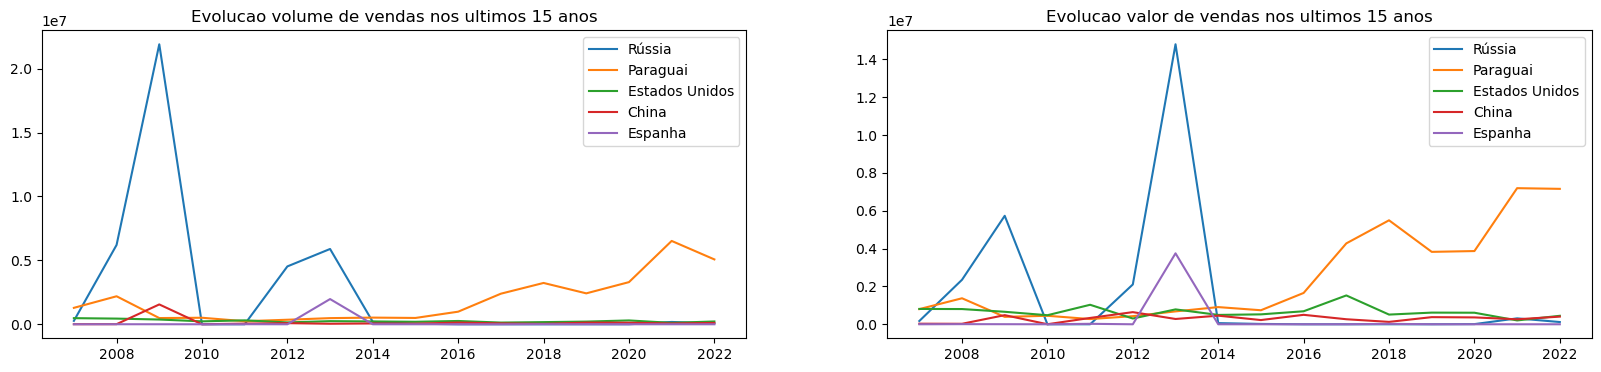

In [17]:
# plotando em um gráfico para analisar

#definindo o tamanho das figuras
figsize1 = (10, 4)
figsize2 = (10, 4)

# filtrando os 5 primeiros países
top_5_paises = base_vinhos['Pais'].unique()[:5]

# criando as figuras e os eixos
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# plotando a primeira figura
      # iterando os paises para criar linhas diferentes para cada pais, é como se eu colocasse varios graficos por cima e muda apenas a posição da linha
for pais in top_5_paises:
      dados_pais = base_vinhos[base_vinhos['Pais'] == pais]
      axes[0].plot(dados_pais['Periodo'], dados_pais['Venda_volume'])
axes[0].set_title('Evolucao volume de vendas nos ultimos 15 anos')
axes[0].legend(base_vinhos['Pais'])

#plotando a segunda figura
      # iterando os paises para criar linhas diferentes para cada pais, é como se eu colocasse varios graficos por cima e muda apenas a posição da linha
for pais in top_5_paises:
      dados_pais = base_vinhos[base_vinhos['Pais'] == pais]
      axes[1].plot(dados_pais['Periodo'], dados_pais['Venda_valor'])
axes[1].set_title('Evolucao valor de vendas nos ultimos 15 anos')
axes[1].legend(base_vinhos['Pais'])

plt.show()

In [22]:
import plotly.express as px
grafico = px.histogram(base_vinhos, x='Venda_valor', color='Pais')
grafico.show()

### Analisando a participação de vendas para cada país

,Pais,Venda_volume,Part_venda_volume,Venda_valor,Part_venda_valor
88,Paraguai,30500229.0,33.419714,39520550.0,33.972657
96,Rússia,39296199.0,43.057635,25677644.0,22.073017
44,Estados Unidos,4042624.0,4.429584,10494605.0,9.021373
94,Reino Unido,1324164.0,1.450913,4855708.0,4.174064
25,China,2517096.0,2.758033,4776915.0,4.106332
89,Países Baixos,1417200.0,1.552855,4156362.0,3.572892
43,Espanha,1993000.0,2.183770,3808552.0,3.273908
1,"Alemanha, República Democrática",1028563.0,1.127017,2784446.0,2.393566
68,Japão,1539635.0,1.687009,2694583.0,2.316318
58,Haiti,1791603.0,1.963095,2327208.0,2.000515


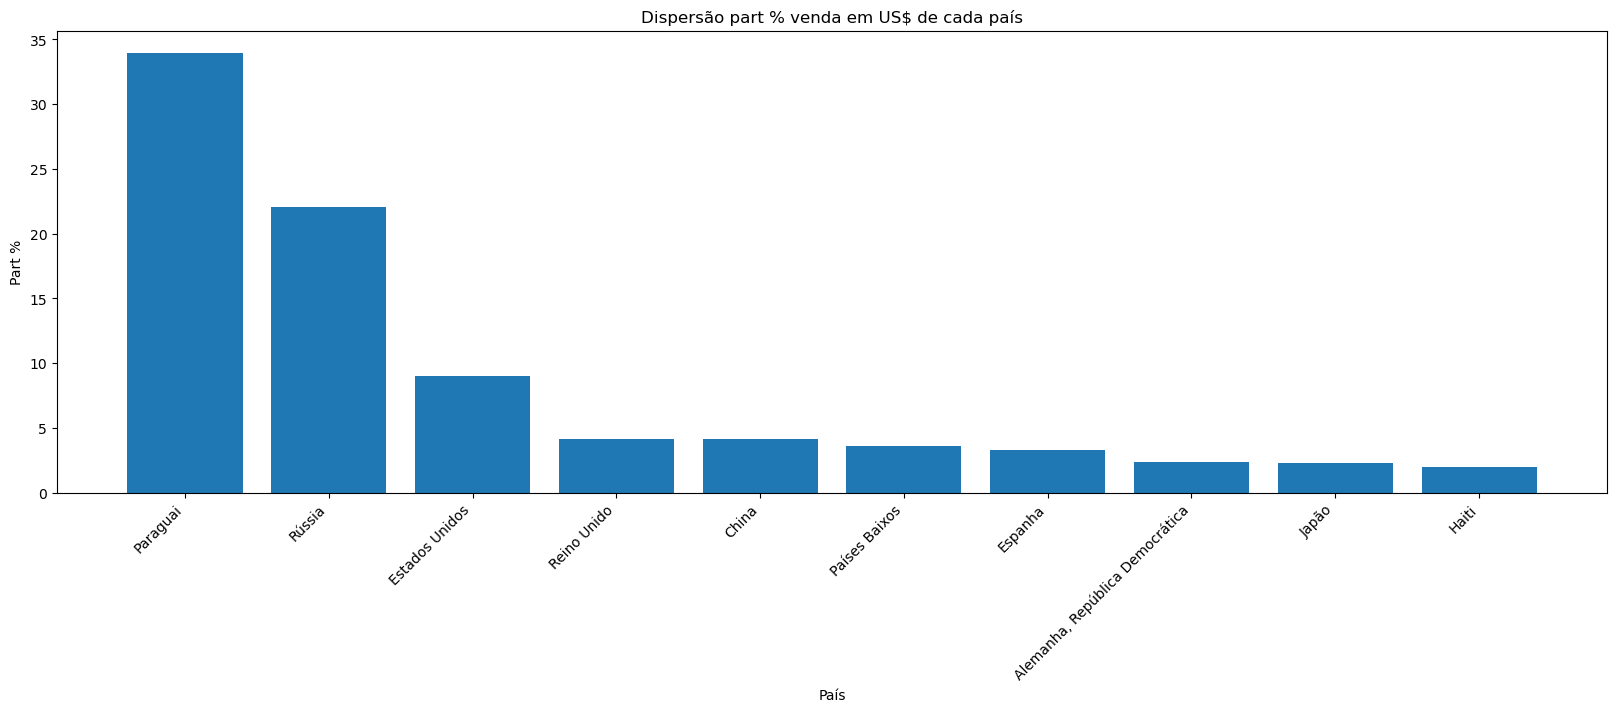

In [16]:
# agrupando a base de vinhos por pais para comparar as vendas
base_vinhos_vendas_acumulado = base_vinhos.groupby(['Pais']).agg({'Venda_volume': 'sum', 'Venda_valor': 'sum'}).reset_index()

# criando coluna de participacao do valor de vendas
base_vinhos_vendas_acumulado['Part_venda_valor'] = (base_vinhos_vendas_acumulado['Venda_valor'] / base_vinhos_vendas_acumulado['Venda_valor'].sum()) * 100

# criando coluna de participacao de volume de vendas
base_vinhos_vendas_acumulado['Part_venda_volume'] = (base_vinhos_vendas_acumulado['Venda_volume'] / base_vinhos_vendas_acumulado['Venda_volume'].sum()) * 100

# reeordenando as colunas
base_vinhos_vendas_acumulado = base_vinhos_vendas_acumulado[['Pais', 'Venda_volume', 'Part_venda_volume', 'Venda_valor', 'Part_venda_valor']]

# classificando o df pela participacao de vendas, para analisar qual pais somos muito dependentes
base_vinhos_vendas_acumulado = base_vinhos_vendas_acumulado.sort_values(by='Part_venda_valor', ascending=0)

# ------------ Exibindo o df -------------

display(base_vinhos_vendas_acumulado.head(10))

# ----------------------------------------
      # plotando um gráfico de barras
top_10_paises_part_venda_valor = base_vinhos_vendas_acumulado[:10]
eixo_x, eixo_y = top_10_paises_part_venda_valor['Pais'], top_10_paises_part_venda_valor['Part_venda_valor']
plt.figure(figsize=(20, 6))
plt.bar(eixo_x, eixo_y)
plt.xlabel('País')
plt.ylabel('Part %')
plt.title('Dispersão part % venda em US$ de cada país')
plt.xticks(rotation=45, ha='right')

plt.show()